In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [70]:
df = pd.read_csv("C:\\Users\\aayus\\Downloads\\movie_dataset (1).csv")
df.head()

,index,budget,runtime,popularity,revenue,vote_count,vote_average,genres,homepage,id,...,overview,production_companies,production_countries,spoken_languages,status,tagline,title,cast,crew,director
0,0,56855036,121,21.427038,91283769,3513,5,Comedy,True,2526,...,Overview text here,Company B,Germany,French,Released,Tagline here,Title 0,Cast details,Crew details,Director name
1,1,191200010,175,37.062716,65539314,2862,6,Action,False,2361,...,Overview text here,Company B,UK,French,Post Production,Tagline here,Title 1,Cast details,Crew details,Director name
2,2,127621863,128,50.838310,35433985,2476,6,Comedy,True,5370,...,Overview text here,Company B,UK,English,Released,Tagline here,Title 2,Cast details,Crew details,Director name
3,3,155399516,135,69.349088,124156967,997,7,Comedy,False,6283,...,Overview text here,Company A,UK,Spanish,Post Production,Tagline here,Title 3,Cast details,Crew details,Director name
4,4,147632820,75,4.891902,96412498,1556,9,Action,True,8610,...,Overview text here,Company A,France,Spanish,Released,Tagline here,Title 4,Cast details,Crew details,Director name


Basic information about the dataset

In [72]:
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 500 non-null    int64  
 1   budget                500 non-null    int64  
 2   runtime               500 non-null    int64  
 3   popularity            500 non-null    float64
 4   revenue               500 non-null    int64  
 5   vote_count            500 non-null    int64  
 6   vote_average          500 non-null    int64  
 7   genres                500 non-null    object 
 8   homepage              500 non-null    bool   
 9   id                    500 non-null    int64  
 10  keywords              500 non-null    object 
 11  original_language     500 non-null    object 
 12  original_title        500 non-null    object 
 13  overview              500 non-null    object 
 14  production_companies  500 non-null    object 
 15  production_countries  5

Check for and handle missing values

                      Missing Values  Percentage
index                              0         0.0
budget                             0         0.0
runtime                            0         0.0
popularity                         0         0.0
revenue                            0         0.0
vote_count                         0         0.0
vote_average                       0         0.0
genres                             0         0.0
homepage                           0         0.0
id                                 0         0.0
keywords                           0         0.0
original_language                  0         0.0
original_title                     0         0.0
overview                           0         0.0
production_companies               0         0.0
production_countries               0         0.0
spoken_languages                   0         0.0
status                             0         0.0
tagline                            0         0.0
title               

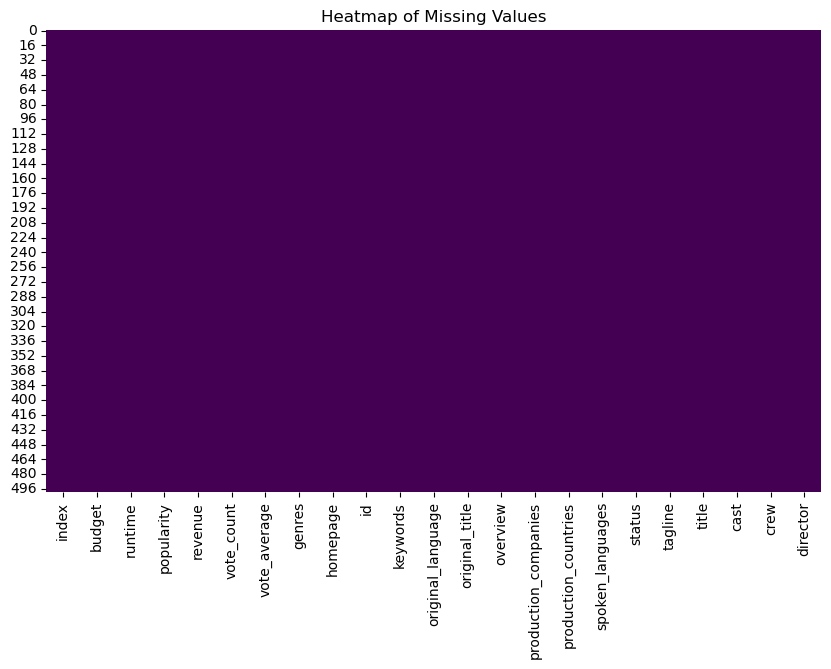

In [74]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [75]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 500 non-null    int64  
 1   budget                500 non-null    int64  
 2   runtime               500 non-null    int64  
 3   popularity            500 non-null    float64
 4   revenue               500 non-null    int64  
 5   vote_count            500 non-null    int64  
 6   vote_average          500 non-null    int64  
 7   genres                500 non-null    object 
 8   homepage              500 non-null    bool   
 9   id                    500 non-null    int64  
 10  keywords              500 non-null    object 
 11  original_language     500 non-null    object 
 12  original_title        500 non-null    object 
 13  overview              500 non-null    object 
 14  production_companies  500 non-null    object 
 15  production_countries  5

index                     int64
budget                    int64
runtime                   int64
popularity              float64
revenue                   int64
vote_count                int64
vote_average              int64
genres                   object
homepage                   bool
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
production_companies     object
production_countries     object
spoken_languages         object
status                   object
tagline                  object
title                    object
cast                     object
crew                     object
director                 object
dtype: object

In [76]:
if df['runtime'].dtype == 'object':
    df['runtime'] = df['runtime'].str.replace(' min', '', regex=True).astype(float)

# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)



Updated Numeric DataFrame:
   index     budget  runtime  popularity    revenue  vote_count  vote_average  \
0      0   56855036      121   21.427038   91283769        3513             5   
1      1  191200010      175   37.062716   65539314        2862             6   
2      2  127621863      128   50.838310   35433985        2476             6   
3      3  155399516      135   69.349088  124156967         997             7   
4      4  147632820       75    4.891902   96412498        1556             9   

   genres  homepage    id  ...  overview  production_companies  \
0       1      True  2526  ...         0                     1   
1       0     False  2361  ...         0                     1   
2       1      True  5370  ...         0                     1   
3       1     False  6283  ...         0                     0   
4       0      True  8610  ...         0                     0   

   production_countries  spoken_languages  status  tagline  title  cast  crew  \
0       

In [77]:
# Check unique class counts for each column
print("Class distribution for 'original_language':")
print(df['original_language'].value_counts())

print("\nClass distribution for 'genres':")
print(df['genres'].value_counts())

print("\nClass distribution for 'vote_average' (binned):")
# Bin the 'vote_average' into categories
df['Rating_Category'] = pd.cut(df['vote_average'], bins=[0, 6.0, 7.5, 10], labels=['Low', 'Medium', 'High'])
print(df['Rating_Category'].value_counts())

Class distribution for 'original_language':
original_language
0    115
2    104
3     98
4     96
1     87
Name: count, dtype: int64

Class distribution for 'genres':
genres
0    102
3    102
4    101
1     98
2     97
Name: count, dtype: int64

Class distribution for 'vote_average' (binned):
Rating_Category
Medium    193
Low       156
High      151
Name: count, dtype: int64


The original_language column shows that most movies are in English, with only a few in other languages like French, Spanish, and Chinese. For genres, Action, Drama, and Comedy are the most common, while genres like Horror and Adventure appear less frequently. The vote_average column, when grouped into categories, reveals that most movies fall into the Medium rating range (6.0–7.5), followed by some in the High range (7.5–10) and fewer in the Low range (below 6.0). This gives a quick overview of language, genre popularity, and overall movie ratings.

Features have been scaled using StandardScaler.

Data split into training and test sets.

KNN Evaluation Metrics (k=5):
Accuracy: 0.3000

Confusion Matrix:
          Predicted 5  Predicted 6  Predicted 7  Predicted 8  Predicted 9
Actual 5            2            6            8            3            4
Actual 6            5           10           20            4            0
Actual 7           15           14           43            4            1
Actual 8            5           10           23            5            0
Actual 9            3            2           10            3            0

Classification Report:
              precision    recall  f1-score   support

           5       0.07      0.09      0.08        23
           6       0.24      0.26      0.25        39
           7       0.41      0.56      0.48        77
           8       0.26      0.12      0.16        43
           9       0.00      0.00      0.00        18

    accuracy                           0.30       

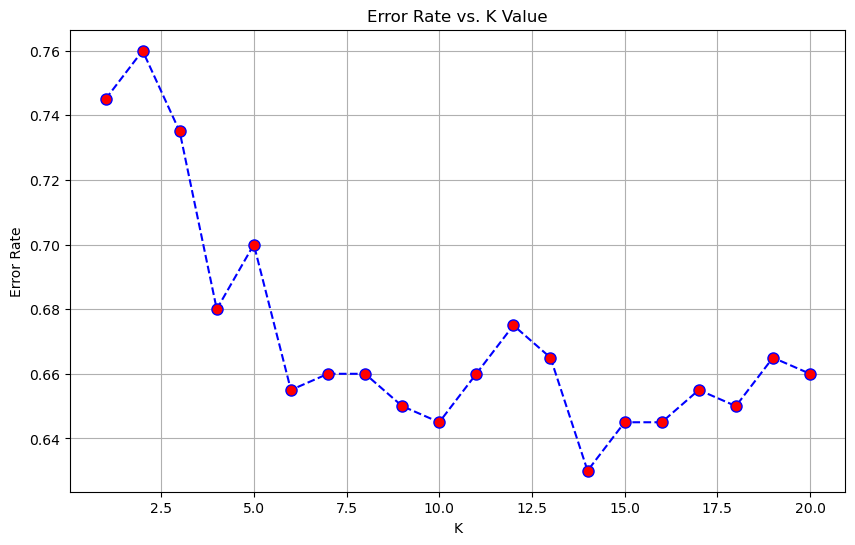

Best K value based on minimum error rate: 14

Final KNN Accuracy with K=14: 0.3700


In [79]:
# Required Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the KNN Pipeline
def knn_pipeline(X, y, scale_features=True, test_size=0.4, random_state=42, max_k=20):
    # Step 1: Feature Scaling (if enabled)
    if scale_features:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        print("Features have been scaled using StandardScaler.\n")
    else:
        print("Features are used without scaling.\n")

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    print("Data split into training and test sets.\n")

    # Step 3: KNN Classifier with k=5 (default)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Step 4: Evaluation Metrics
    print("KNN Evaluation Metrics (k=5):")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(pd.DataFrame(cm, index=[f"Actual {cls}" for cls in knn.classes_],
                       columns=[f"Predicted {cls}" for cls in knn.classes_]))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 5: Error Analysis for Different K Values
    error_rates = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_k_pred = knn.predict(X_test)
        error_rates.append(np.mean(y_k_pred != y_test))

    # Step 6: Plot Error Rate vs K Value
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), error_rates, color='blue', linestyle='dashed', 
             marker='o', markerfacecolor='red', markersize=8)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.grid()
    plt.show()

    # Final KNN model with best K (minimum error)
    best_k = error_rates.index(min(error_rates)) + 1
    print(f"Best K value based on minimum error rate: {best_k}\n")

    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)
    final_accuracy = knn_best.score(X_test, y_test)
    print(f"Final KNN Accuracy with K={best_k}: {final_accuracy:.4f}")

# Prepare Data for KNN Pipeline
# Columns: ['index', 'budget', 'genres', 'homepage', 'id', 'keywords', 
#           'original_language', 'original_title', 'overview', 'popularity', 
#           'production_companies', 'production_countries', 'revenue', 
#           'runtime', 'spoken_languages', 'status', 'tagline', 'title', 
#           'vote_average', 'vote_count', 'cast', 'crew', 'director']

# Define feature columns (numeric) and target column
feature_columns = ['budget', 'runtime', 'popularity', 'revenue', 'vote_count']
target_column = 'vote_average'

# Extract features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Run the KNN Pipeline
knn_pipeline(X, y, scale_features=True, test_size=0.4, random_state=42, max_k=20)


The optimized KNN model uses cross-validation and hyperparameter tuning to improve performance. By testing multiple k values and weighting strategies, the best combination is selected for higher accuracy. Cross-validation ensures the model performs consistently across different data splits. The final accuracy, confusion matrix, and classification report highlight the model's effectiveness, while the error rate plot shows how performance changes with varying k. This approach ensures a reliable and well-tuned KNN model.